<a href="https://colab.research.google.com/github/dantls/python-with-financial-market/blob/main/03_Analisando_Acoes_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

import seaborn as sns


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


# Obtendo e tratando os dados

In [5]:
tickers = ['^BVSP', 'USDBRL=X']

carteira = web.get_data_yahoo(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [6]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
...,...,...
2021-01-01,5.1921,NaN
2021-01-04,5.1919,118558.000000
2021-01-05,5.2953,119223.000000


## Limpeza de dados

In [28]:
carteira = carteira.dropna()


## Renomeando colunas

In [27]:
carteira.columns = ['IBOVESPA','DOLAR']

#Plotando gráficos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c4cbd4908>,
      dtype=object)

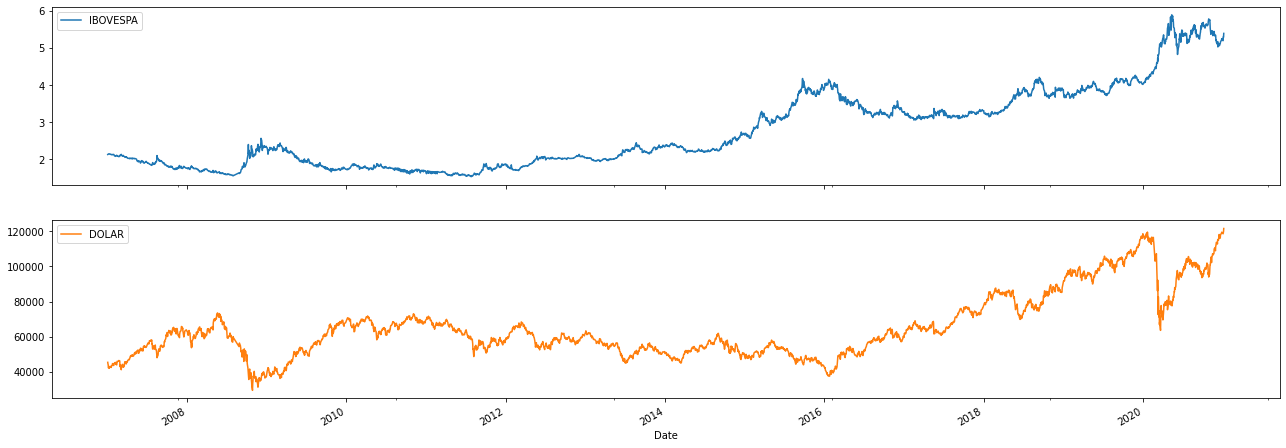

In [13]:
carteira.plot(subplots=True, figsize=(22,8))

## Aprimorando gráfico

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c3e1d9668>,
      dtype=object)

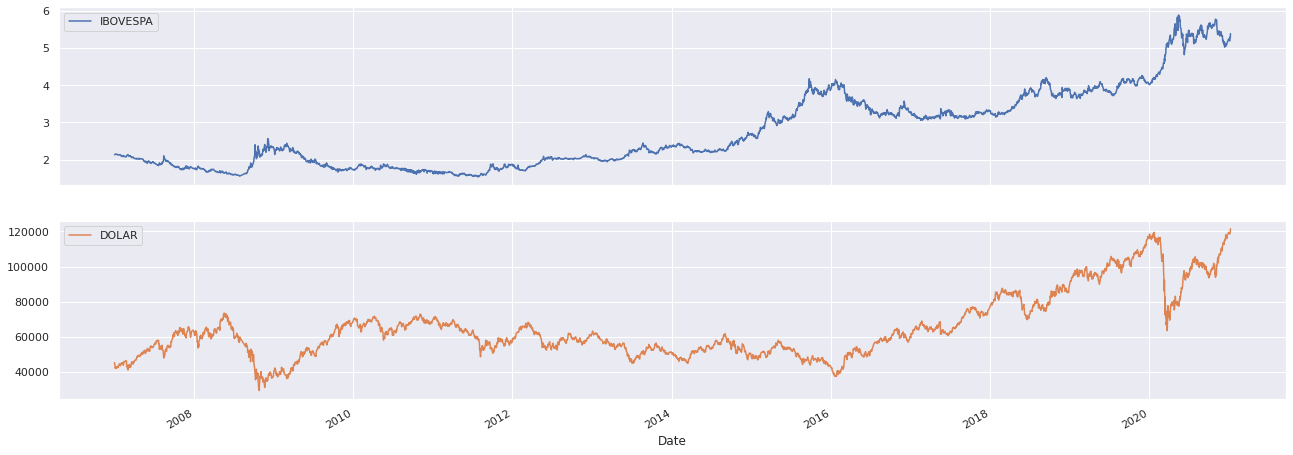

In [16]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

## Calculando correlação

In [26]:
carteira.corr()

,IBOVESPA,DOLAR
IBOVESPA,1.000000,0.596567
DOLAR,0.596567,1.000000


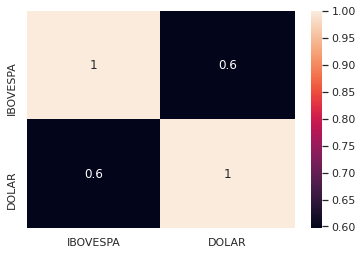

In [20]:
sns.heatmap(carteira.corr(), annot=True)

# Criando janela de observação

In [29]:
carteira["DOLAR"]

Date
2007-01-02     45383.000000
2007-01-03     44445.000000
2007-01-04     44020.000000
2007-01-05     42245.000000
2007-01-08     42830.000000
                  ...      
2020-12-30    119306.000000
2021-01-04    118558.000000
2021-01-05    119223.000000
2021-01-06    119851.000000
2021-01-07    121559.523438
Name: DOLAR, Length: 3429, dtype: float64

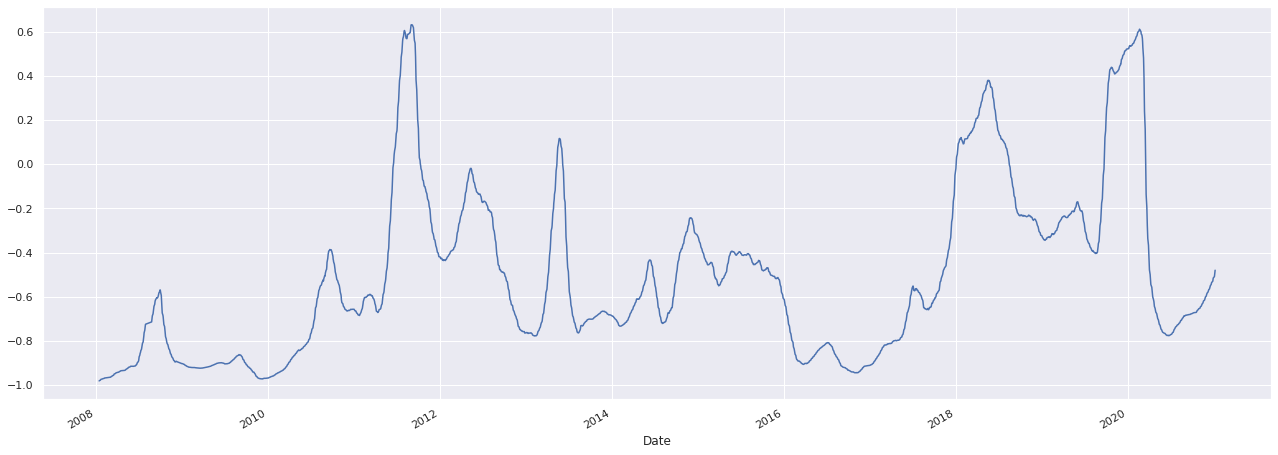

In [37]:
carteira["DOLAR"].rolling(252).corr(carteira['IBOVESPA']).plot(figsize=(22,8))
